In [17]:
import pandas as pd

In [18]:
Chile_df = pd.read_csv('Datasets/SismosChileFinal.csv')

In [19]:
Chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           118307 non-null  int64  
 1   Fecha local          118307 non-null  object 
 2   Fecha UTC            118307 non-null  object 
 3   Latitud              118307 non-null  float64
 4   Longitud             118307 non-null  float64
 5   Profundidad(Km)      118307 non-null  float64
 6   MagnitudPromedio     118307 non-null  float64
 7   Magnitudes           118307 non-null  object 
 8   Lugar del Epicentro  118307 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 8.1+ MB


In [20]:
Chile_df.isnull().sum()

Unnamed: 0             0
Fecha local            0
Fecha UTC              0
Latitud                0
Longitud               0
Profundidad(Km)        0
MagnitudPromedio       0
Magnitudes             0
Lugar del Epicentro    0
dtype: int64

In [21]:
Chile_df.head()

,Unnamed: 0,Fecha local,Fecha UTC,Latitud,Longitud,Profundidad(Km),MagnitudPromedio,Magnitudes,Lugar del Epicentro
0,0,2003-01-01 16:26:00,2003-01-01 19:26:00,-34.710,-70.174,0.0,3.1,Mc(3.1),76 km al E de San Fernando
1,1,2003-01-01 14:22:00,2003-01-01 17:22:00,-35.112,-71.375,63.1,3.0,"Ml(3.1), Mc(2.9)",44 km al NE de Talca
2,2,2003-01-01 14:02:00,2003-01-01 17:02:00,-31.051,-71.310,64.4,2.7,"Ml(2.5), Mc(2.9)",33 km al NO de Combarbalá
3,3,2003-01-01 13:25:00,2003-01-01 16:25:00,-30.159,-70.141,5.4,3.0,"Ml(2.7), Mc(3.3)",57 km al E de Vicuña
4,4,2003-01-01 12:54:00,2003-01-01 15:54:00,-32.138,-71.753,11.0,3.4,"Ml(3.3), Mc(3.6)",60 km al NO de La Ligua


**Análisis de ubicación:**

In [22]:
Chile_df['Lugar del Epicentro'].value_counts()

74 km al NO de Futaleufú     147
39 km al E de Colina         132
77 km al SE de Socaire       126
80 km al SE de Socaire       126
78 km al SE de Socaire       123
                            ... 
41 km al SO de Las Cabras      1
145 km al E de Vicuña          1
60 km al N de Toltén           1
85 km al SO de Navidad         1
7 km al O de Temuco            1
Name: Lugar del Epicentro, Length: 33807, dtype: int64

Gráfico de barras del top 10 de los lugares con mayor magnitud promedio.

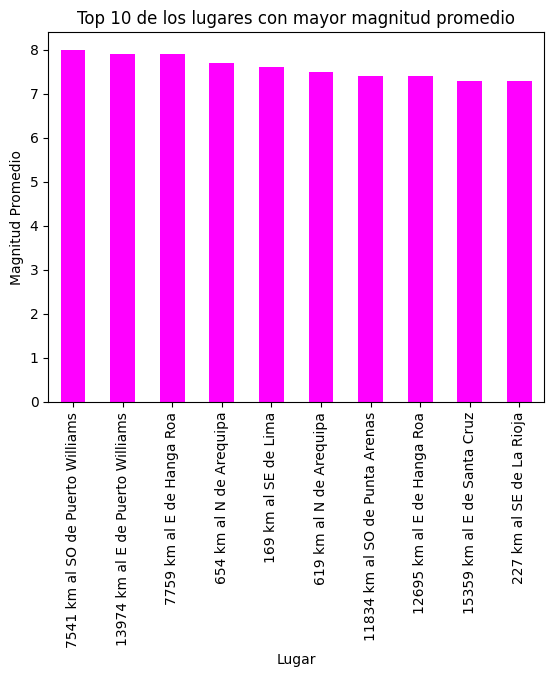

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los sismos por región y calcular la magnitud promedio de cada región
promedio_magnitudes = Chile_df.groupby("Lugar del Epicentro")["MagnitudPromedio"].mean()

# Obtener el top 10 de regiones con mayor magnitud promedio
top_10_magnitudes = promedio_magnitudes.nlargest(10)

# Crear un gráfico de barras del top 10 de regiones con mayor magnitud promedio
top_10_magnitudes.plot(kind="bar", color='magenta')

# Configurar el título y etiquetas de los ejes
plt.title("Top 10 de los lugares con mayor magnitud promedio")
plt.xlabel("Lugar")
plt.ylabel("Magnitud Promedio")

# Mostrar el gráfico de barras
plt.show()



**Análisis de magnitud y profundidad:**

Medidas de resumen como la media, mediana, desviación estándar y percentiles:

In [24]:
import pandas as pd

# Cálculo de la media
media = Chile_df["MagnitudPromedio"].mean()

# Cálculo de la mediana
mediana = Chile_df["MagnitudPromedio"].median()

# Cálculo de la desviación estándar
desviacion_estandar = Chile_df["MagnitudPromedio"].std()

# Cálculo de percentiles (25%, 50%, 75%)
percentiles = Chile_df["MagnitudPromedio"].quantile([0.25, 0.5, 0.75])

print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)
print("Percentiles:")
print(percentiles)


Media: 3.2348254963780674
Mediana: 3.1
Desviación Estándar: 0.6780616477855558
Percentiles:
0.25    2.8
0.50    3.1
0.75    3.6
Name: MagnitudPromedio, dtype: float64


Análisis de la distribución de las magnitudes de los sismos utilizando gráficos de barras o histogramas.

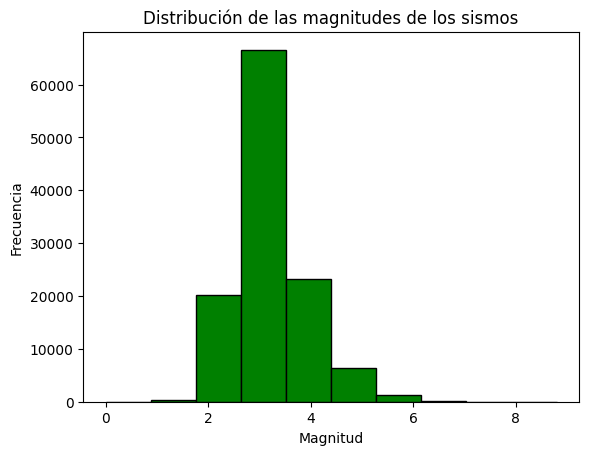

In [25]:
import matplotlib.pyplot as plt

# Crear un histograma de las magnitudes de los sismos
plt.hist(Chile_df["MagnitudPromedio"], bins=10, edgecolor='black',color='green')

# Configurar el título y etiquetas de los ejes
plt.title("Distribución de las magnitudes de los sismos")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()


Exploramos la posible relación entre la magnitud del sismo y su profundidad, para visualizar mostramos un gráfico de dispersión (scatter plot).

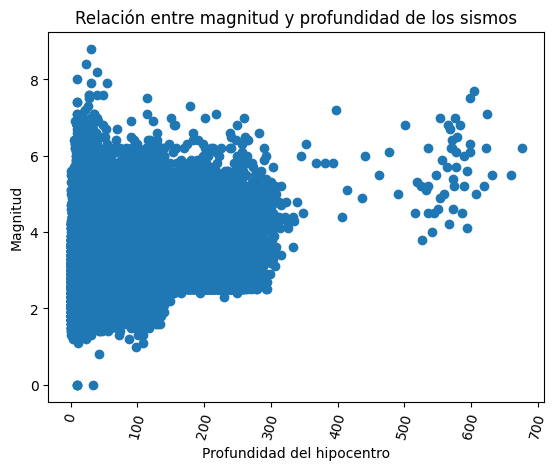

In [26]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de magnitud vs. profundidad
plt.scatter(Chile_df["Profundidad(Km)"], Chile_df["MagnitudPromedio"])

# Configurar el título y etiquetas de los ejes
plt.title("Relación entre magnitud y profundidad de los sismos")
plt.xlabel("Profundidad del hipocentro")
plt.ylabel("Magnitud")
plt.xticks(rotation=75)
# Mostrar el gráfico de dispersión
plt.show()


Graficamos Histograma de Magnitud con una línea de densidad (kde) que muestra la estimación de la distribución de magnitudes.

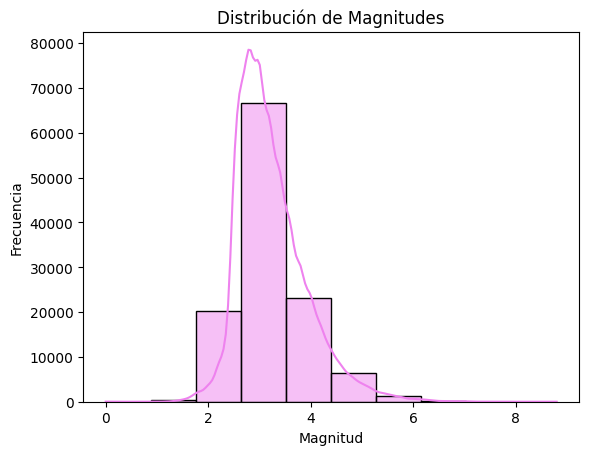

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=Chile_df, x='MagnitudPromedio', bins=10, kde=True, color='violet')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Magnitudes')
plt.show()

Gráfico de dispersión utilizando las columnas "Longitud" y "Latitud" para visualizar la distribución geográfica de los eventos:

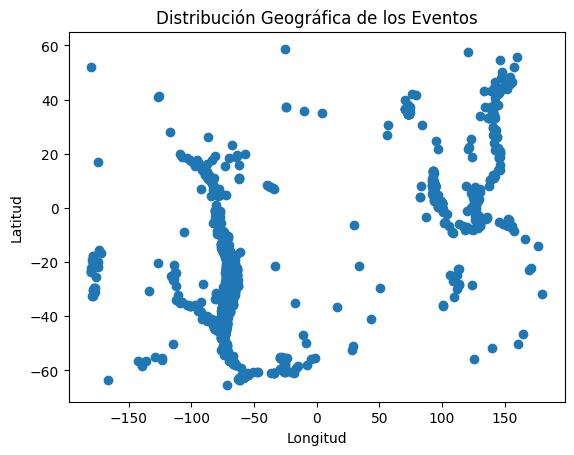

In [28]:
import matplotlib.pyplot as plt

plt.scatter(Chile_df['Longitud'], Chile_df['Latitud'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de los Eventos')
plt.show()


Mapa interactivo de los sismos. Los puntos en el mapa representarán los sismos y al pasar el cursor sobre ellos se mostrará el lugar correspondiente.

In [29]:
"""import folium

# Crear un mapa de los sismos
mapa = folium.Map(location=[Chile_df['Latitud'].mean(), Chile_df['Longitud'].mean()], zoom_start=3)

# Agregar marcadores para cada sismo
for index, row in Chile_df.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=row['Lugar del Epicentro']).add_to(mapa)

# Mostrar el mapa
mapa"""

"import folium\n\n# Crear un mapa de los sismos\nmapa = folium.Map(location=[Chile_df['Latitud'].mean(), Chile_df['Longitud'].mean()], zoom_start=3)\n\n# Agregar marcadores para cada sismo\nfor index, row in Chile_df.iterrows():\n    folium.Marker([row['Latitud'], row['Longitud']], popup=row['Lugar del Epicentro']).add_to(mapa)\n\n# Mostrar el mapa\nmapa"

In [30]:
import pandas as pd

# Dividir la columna "Hora y día del sismo" en fecha y hora
Chile_df['Fecha del sismo'] = pd.to_datetime(Chile_df['Fecha local']).dt.date
Chile_df['Hora del sismo'] = pd.to_datetime(Chile_df['Fecha local']).dt.time

# Eliminar la columna original "Hora y día del sismo"
#Chile_df = Chile_df.drop('Hora y dia del Sismo', axis=1)

# Verificar el resultado
print(Chile_df.head())


   Unnamed: 0          Fecha local            Fecha UTC  Latitud  Longitud  \
0           0  2003-01-01 16:26:00  2003-01-01 19:26:00  -34.710   -70.174   
1           1  2003-01-01 14:22:00  2003-01-01 17:22:00  -35.112   -71.375   
2           2  2003-01-01 14:02:00  2003-01-01 17:02:00  -31.051   -71.310   
3           3  2003-01-01 13:25:00  2003-01-01 16:25:00  -30.159   -70.141   
4           4  2003-01-01 12:54:00  2003-01-01 15:54:00  -32.138   -71.753   

   Profundidad(Km)  MagnitudPromedio        Magnitudes  \
0              0.0               3.1           Mc(3.1)   
1             63.1               3.0  Ml(3.1), Mc(2.9)   
2             64.4               2.7  Ml(2.5), Mc(2.9)   
3              5.4               3.0  Ml(2.7), Mc(3.3)   
4             11.0               3.4  Ml(3.3), Mc(3.6)   

          Lugar del Epicentro Fecha del sismo Hora del sismo  
0  76 km al E de San Fernando      2003-01-01       16:26:00  
1        44 km al NE de Talca      2003-01-01       14:2

In [31]:
Chile_df.head()

,Unnamed: 0,Fecha local,Fecha UTC,Latitud,Longitud,Profundidad(Km),MagnitudPromedio,Magnitudes,Lugar del Epicentro,Fecha del sismo,Hora del sismo
0,0,2003-01-01 16:26:00,2003-01-01 19:26:00,-34.710,-70.174,0.0,3.1,Mc(3.1),76 km al E de San Fernando,2003-01-01,16:26:00
1,1,2003-01-01 14:22:00,2003-01-01 17:22:00,-35.112,-71.375,63.1,3.0,"Ml(3.1), Mc(2.9)",44 km al NE de Talca,2003-01-01,14:22:00
2,2,2003-01-01 14:02:00,2003-01-01 17:02:00,-31.051,-71.310,64.4,2.7,"Ml(2.5), Mc(2.9)",33 km al NO de Combarbalá,2003-01-01,14:02:00
3,3,2003-01-01 13:25:00,2003-01-01 16:25:00,-30.159,-70.141,5.4,3.0,"Ml(2.7), Mc(3.3)",57 km al E de Vicuña,2003-01-01,13:25:00
4,4,2003-01-01 12:54:00,2003-01-01 15:54:00,-32.138,-71.753,11.0,3.4,"Ml(3.3), Mc(3.6)",60 km al NO de La Ligua,2003-01-01,12:54:00


Creamos dos graficos unos de Lineas para visualizar la distribución temporal y un histograma para visualizar la frecuencia de sismos en diferentes fechas.

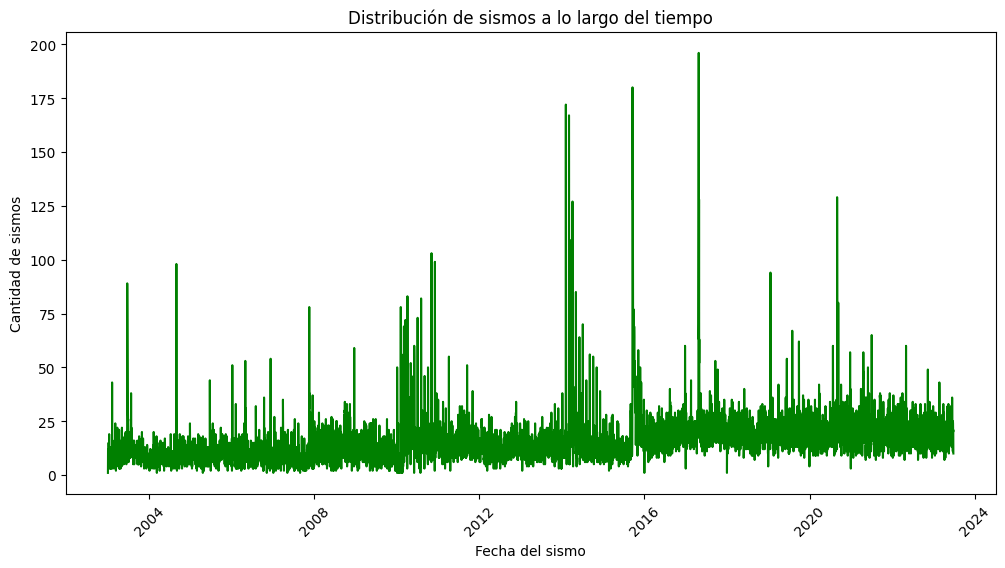

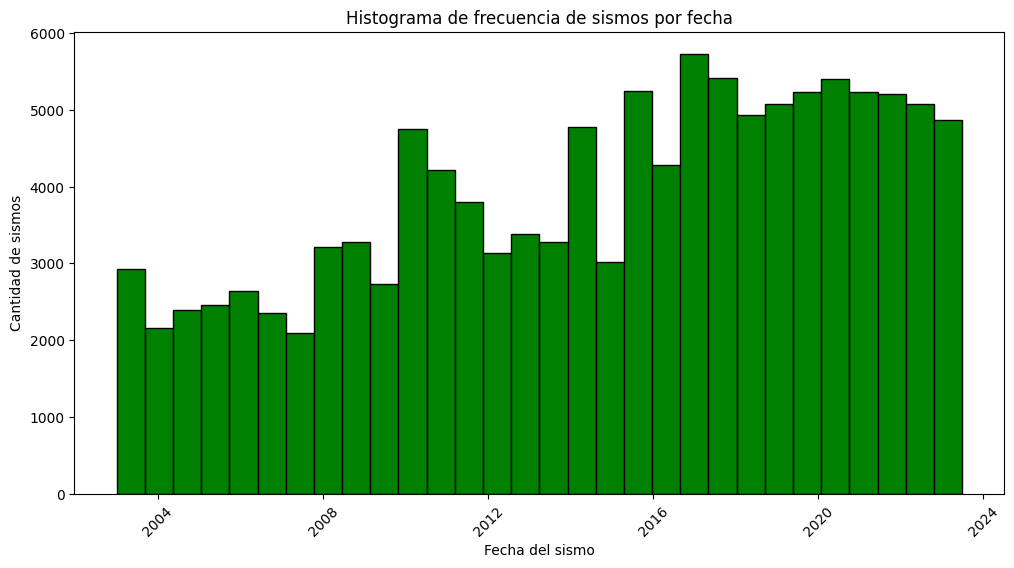

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar los sismos por fecha
sismos_por_fecha = Chile_df['Fecha del sismo'].value_counts().sort_index()

# Crear un gráfico de líneas para visualizar la distribución temporal
plt.figure(figsize=(12, 6))
plt.plot(sismos_por_fecha.index, sismos_por_fecha.values, color='green')
plt.xlabel('Fecha del sismo')
plt.ylabel('Cantidad de sismos')
plt.title('Distribución de sismos a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

# Crear un histograma para visualizar la frecuencia de sismos en diferentes fechas
plt.figure(figsize=(12, 6))
plt.hist(Chile_df['Fecha del sismo'], bins=30, color='green', edgecolor='black')
plt.xlabel('Fecha del sismo')
plt.ylabel('Cantidad de sismos')
plt.title('Histograma de frecuencia de sismos por fecha')
plt.xticks(rotation=45)
plt.show()


Utilizamos un grafico de barras para Analizar patrones estacionales o tendencias a lo largo de los días de la semana.

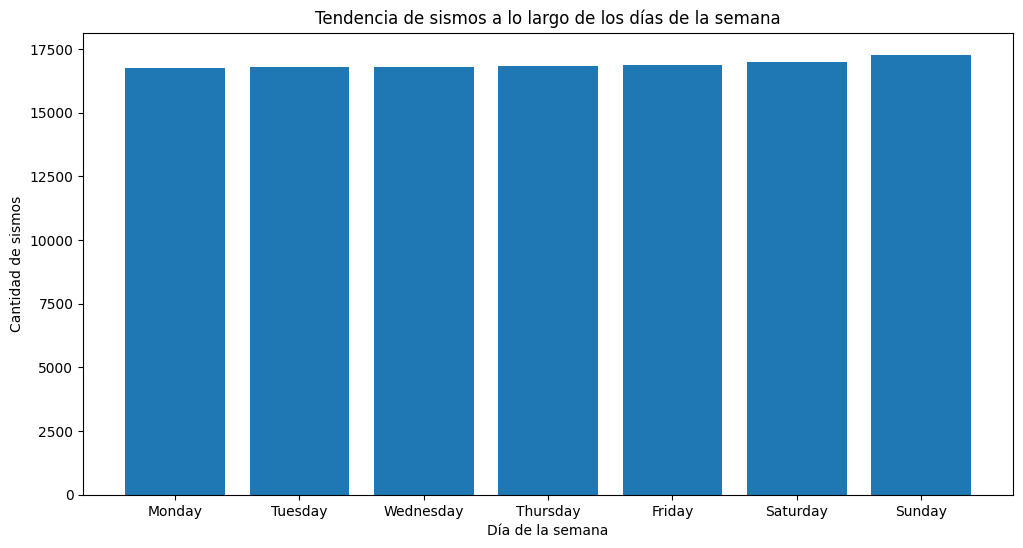

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Convierte la columna "Fecha del sismo" en un objeto de fecha y tiempo
Chile_df['Fecha del sismo'] = pd.to_datetime(Chile_df['Fecha del sismo'])

# Extrae información sobre los días de la semana
Chile_df['Día de la semana'] = Chile_df['Fecha del sismo'].dt.day_name()


# Analizar patrones estacionales o tendencias a lo largo de los días de la semana
sismos_por_dia_semana = Chile_df['Día de la semana'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
if not sismos_por_dia_semana.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(sismos_por_dia_semana.index, sismos_por_dia_semana.values)
    plt.xlabel('Día de la semana')
    plt.ylabel('Cantidad de sismos')
    plt.title('Tendencia de sismos a lo largo de los días de la semana')
    plt.show()
else:
    print("No hay datos de sismos por días de la semana.")



Nube de palabras de los Lugares con mas sismos.

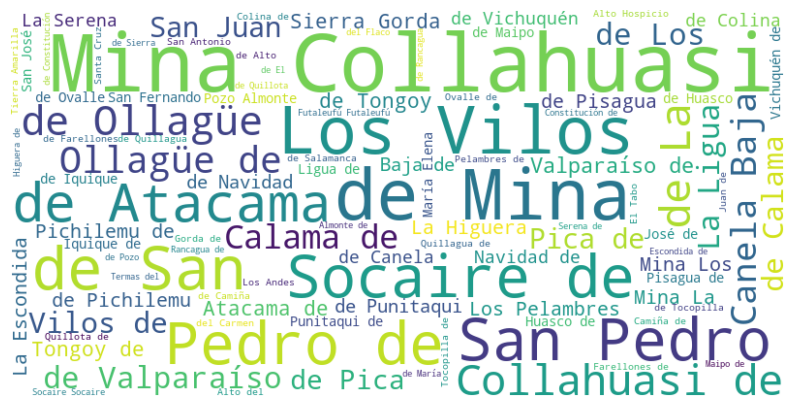

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Obtener una lista de todos los Lugares
titulos = Chile_df['Lugar del Epicentro'].tolist()

# Unir todos los Lugares en un solo string
text = ' '.join(titulos)

#Para eliminar palabras que se repiten y no hacen al contenido:
palabras_a_eliminar = ["al E", "E de", "al O","O de", "al SE","SE de", "al NO", "NO de", "al S", "S de", "al N", "N de", "al NE", "NE de", "al SO", "SO de", "km"]

for palabra in palabras_a_eliminar:
    text = text.replace(palabra, "")

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()